# Carregar Biliotecas | Variáveis Globais

In [13]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np

PATH = 'C:\\Users\\leandro\\Desktop\\PROJECTS\\Log'
FILE_NAME_EXCEL = 'access_mng3node.xlsx'

# Métodos Auxiliares

In [14]:
def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')

def convToInt(val):
    result = re.sub('\W', '' , val)
    return int(result)

def convToSegundo(val):
    result = re.sub('\W', '' , val)
    val = int(result)
    
    return val/1000

def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile

# Parse do Acess Log

In [15]:
dadosAccesslog = pd.read_csv(PATH + '\\access_mng3node.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 5, 6, 8, 9, 10],
                   names=['host', 'date_time', 'Metodo', 'csuri' ,'status', 'timetaken','bytes']
                       
                             ,
                   converters={'date_time': parse_datetime,
                             'status': convToInt,
                              'bytes': convToInt,
                              'timetaken': convToSegundo}
                   )
dadosAccesslog = dadosAccesslog.set_index('date_time')

dadosAccesslog.head(10)
print(type(dadosAccesslog['date_time']))

ValueError: time data '1:14' does not match format '%d/%b/%Y:%H:%M'

In [ ]:
[0, 3, 5, 6, 8, 9, 10],

## Pivotar o DataFrame

In [13]:
pivot_al = pd.pivot_table(dadosAccesslog, index=['date_time'], values=['bytes', 'timetaken'],
                           aggfunc={'timetaken': np.median}).rank(ascending=False)
pivot_al.head()

,timetaken
date_time,
2018-11-06 11:15:00,15.0
2018-11-06 11:16:00,20.0
2018-11-06 11:17:00,36.0
2018-11-06 11:18:00,239.5
2018-11-06 11:19:00,7.0


# Percentil 90 Apenas nas Transações 200

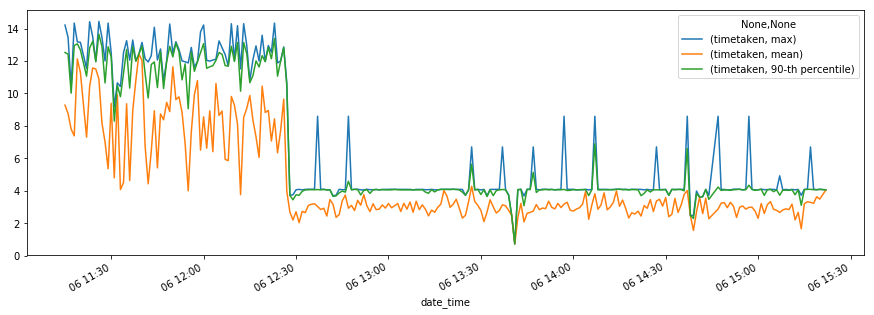

In [14]:
gp_Percentil_al = dadosAccesslog.loc[dadosAccesslog['status'] == 200]
gp_Percentil_al = gp_Percentil_al.groupby(['date_time']).agg({    
    'timetaken': ['max', 'mean', percentile(90)]
})
gp_Percentil_al.plot(figsize=(15, 5))

# Agrupar por URI

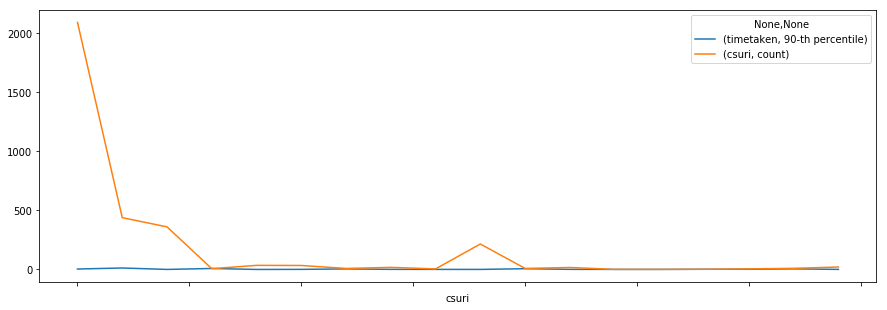

In [15]:
gp_uri_al = dadosAccesslog.groupby(['csuri']).agg({    
    'timetaken': [percentile(90)],
    'csuri' : ['count']
})
gp_uri_al.plot( figsize=(15, 5))

## Apresentar as URIs mais Acessadas

sdasdas asdasdas d

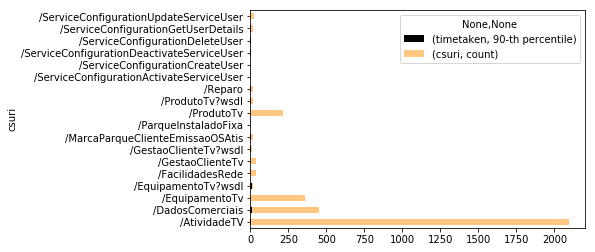

In [16]:
gp_uri_al.plot.barh(stacked=True, colormap='copper');

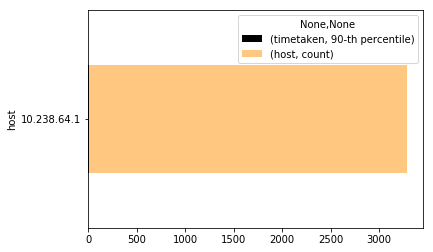

In [17]:
gp_host_al = dadosAccesslog.groupby(['host']).agg({    
    'timetaken': [percentile(90)],
    'host' : ['count']
})
gp_host_al.plot.barh(stacked=True, colormap='copper');

# Distribuição de Resposta Com Erro

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019606251CC0>],
      dtype=object)

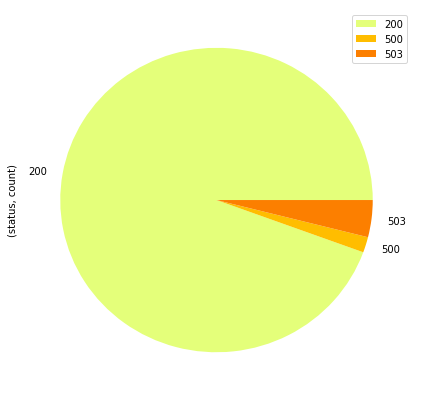

In [18]:
gp_erros_al = dadosAccesslog.groupby(['status']).agg({
    
    'status': ['count']
})
gp_erros_al.plot.pie(subplots=True, figsize=(7, 7), colormap='Wistia')

# Criar Filtro

In [19]:
dfFiltro = dadosAccesslog.loc[dadosAccesslog['status'] == 200]


dfFiltro['timetaken'].describe()

count    3100.000000
mean        3.848988
std         2.938068
min         0.435000
25%         2.478000
50%         3.668000
75%         4.056000
max        14.445000
Name: timetaken, dtype: float64

# SAVE to Excel

writer = pd.ExcelWriter(PATH + FILE_NAME_EXCEL, engine='xlsxwriter')
dadosAccesslog.to_excel(writer, sheet_name='Plan1')
writer.save()

(0.0, 3.0, 0.0, 50.0)

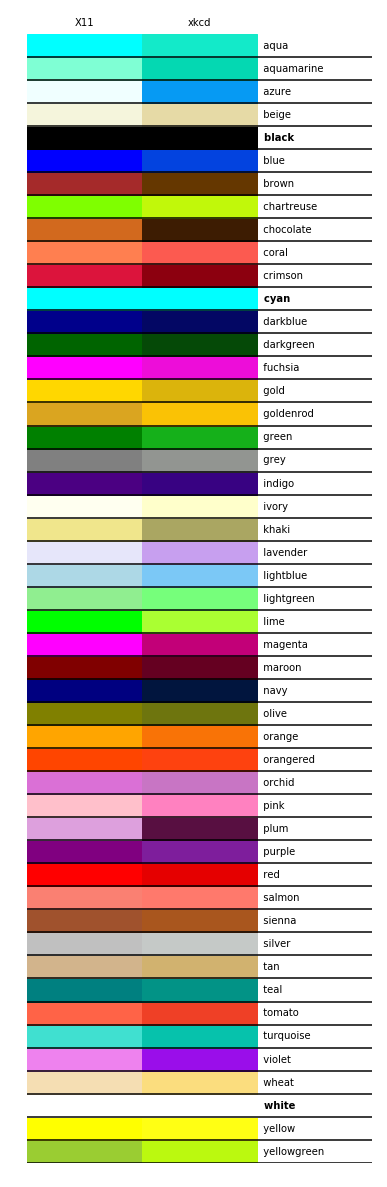

In [20]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[4.8, 16])
ax = fig.add_axes([0, 0, 1, 1])

for j, n in enumerate(sorted(overlap, reverse=True)):
    weight = None
    cn = mcd.CSS4_COLORS[n]
    xkcd = mcd.XKCD_COLORS["xkcd:" + n].upper()
    if cn == xkcd:
        weight = 'bold'

    r1 = mpatch.Rectangle((0, j), 1, 1, color=cn)
    #print(n)
    r2 = mpatch.Rectangle((1, j), 1, 1, color=xkcd)
    txt = ax.text(2, j+.5, '  ' + n, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.add_patch(r2)
    ax.axhline(j, color='k')

ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
ax.text(1.5, j + 1.5, 'xkcd', ha='center', va='center')
ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

In [21]:
dadosAccesslog.tail(20)

,host,Metodo,csuri,status,timetaken,bytes
date_time,,,,,,
2018-11-06 15:18:00,10.238.64.1,"""POST",/AtividadeTV,200,4.053,300276
2018-11-06 15:18:00,10.238.64.1,"""POST",/AtividadeTV,200,2.480,140775
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,4.054,439069
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,4.053,372833
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,2.480,157800
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,4.064,372495
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,2.478,140439
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,3.675,561697
2018-11-06 15:19:00,10.238.64.1,"""POST",/AtividadeTV,200,3.694,461564
